# Eigenvalue Inversion 

#### The goal of this is to compute the Eigenvalue inversion after completing the Quantum Phase Estimation

## Imports

In [1]:
from qiskit import QuantumCircuit,transpile, assemble
import qiskit_aer
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from numpy import pi
from math import sqrt

### This circuit will perform the eigenvalue inversion

In [1]:
def inv(num): #this will be the number of qubits
    qc = QuantumCircuit(num+1)#ancillla will be used

    for q in range(num):
        qc.h(q)

    qc.unitary([[1,0],[0,-1]],num)
    """
    [ 1  0 ] test matrix bc it is easy to verify
    [ 0 -1 ]
    """
    qc = qft(qc, num)  # Apply QFT
    qc = qft(qc, num).inverse() 
    
    qc.measure_all()

    return qc


#(A)-1b=x 

## quantum fourier transform code

In [3]:
def qft(qc, n):
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(pi/(2**(j-i)), i, j)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc

## Test

## This part is only for testing with different inputs 

{'01010': 65, '00111': 51, '01001': 62, '00101': 75, '00001': 68, '00011': 67, '00110': 72, '01100': 52, '00100': 72, '01000': 63, '01110': 62, '00010': 61, '00000': 67, '01111': 70, '01101': 64, '01011': 53}


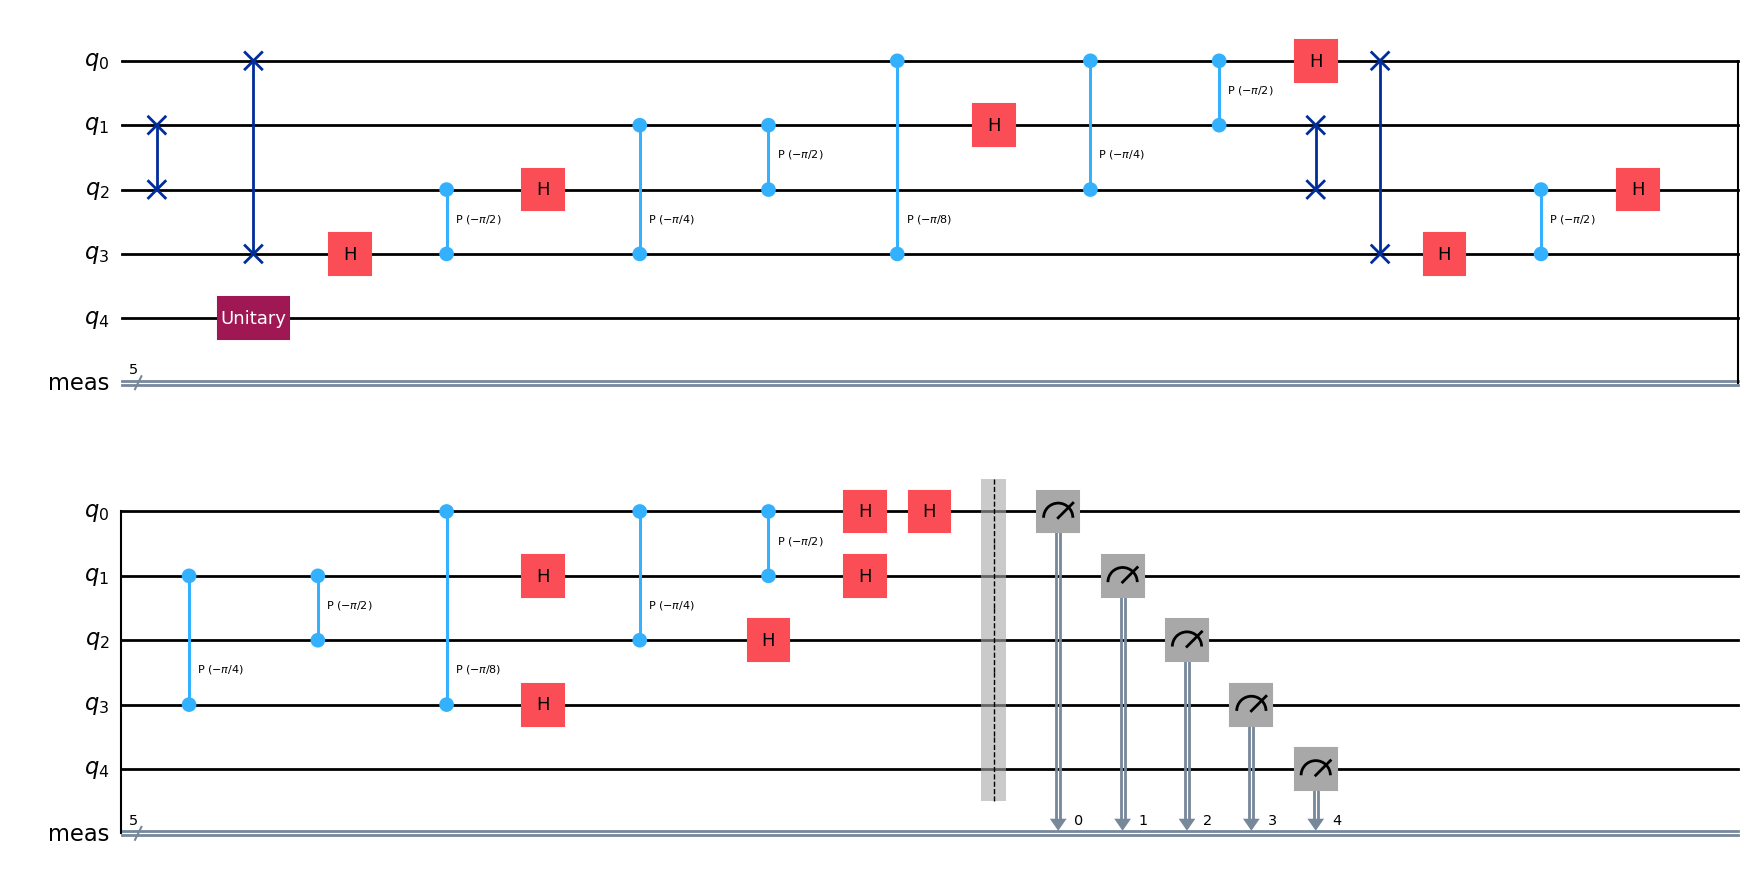

In [4]:
#=======Number of qubits used====
num = 4                       #||
#================================

num_qubits = 4

qc = inv(num_qubits)


backend = Aer.get_backend('aer_simulator')
tqc = transpile(qc, backend)
result = backend.run(tqc, shots=1024).result()  


counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


qc.draw('mpl')